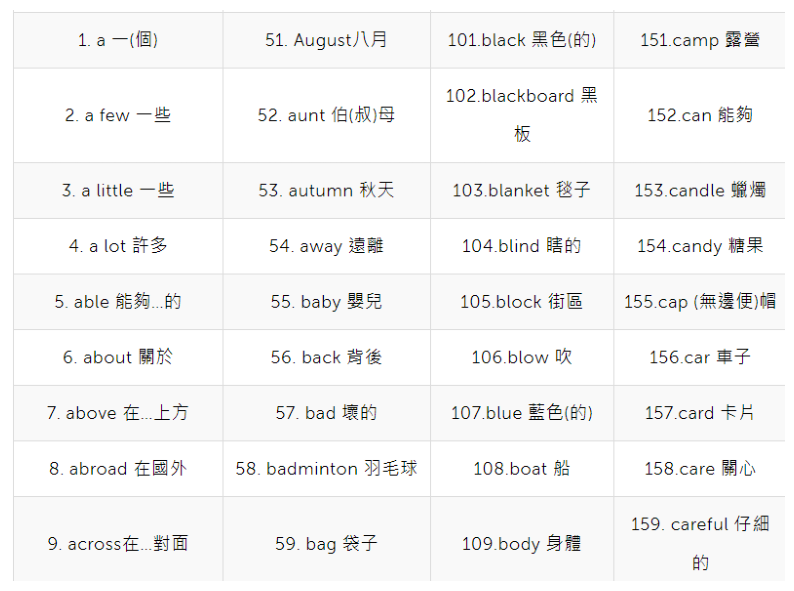

'1a —((a) 51. August/\\Ai 101. black $ (89) 151.camp BE\n102.blackboard 2\n2.a few —# 52. aunt (Ams 152.can 8539\nR\n3.a little —# 53. autumn KF 103.blanket #F — 153.candle #/5\n4.alot#S 54. away SBE 104.blind BERD 154.candy #2\n5. able 8539_.89 55. baby S258 105.block #1 155.cap (#32 @)08\n6. about BARS 56. back B#& 106.blow IR 156.car BF\n7. above #... £7 57. bad AN 107.blue 2& (#9) 157.card EA\n8. abroad EES 58. badminton WEI 108.boat A 158.care Bil\n159. careful #4\n9. acrossté.. 4H 59. bag BF 109.body S48 6\n'

In [9]:
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10),dpi=100)
img = cv2.imread('./14203622.png')
#cv2.imshow( 'img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
img = img[:,:,::-1]
plt.imshow(img)
plt.axis('off')
plt.show()
coustom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=coustom_config)

In [120]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#image = cv2.imread('load.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow("img_gray",img_gray)
#cv2.imshow("image",image)
cv2.waitKey(0)


-1

In [121]:

img_canny = cv2.Canny(img_gray, threshold1=100, threshold2=200)
cv2.imshow("img_canny",img_canny)
cv2.waitKey(0)

-1

In [122]:
img_bilateralFilter = cv2.bilateralFilter(img,9,75,75)
cv2.imshow("img_bilateralFilter",img_bilateralFilter)
cv2.imshow("img",img)
cv2.waitKey(0)

-1

In [123]:
img_bil_gray = cv2.cvtColor(img_bilateralFilter,cv2.COLOR_RGB2GRAY)
img_blf_g_canny = cv2.Canny(img_bil_gray, threshold1=100, threshold2=200)
cv2.imshow("img_blf_g_canny",img_blf_g_canny)
cv2.imshow("img_canny",img_canny)
cv2.waitKey(0)

-1

In [124]:
ret, img_threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("img_threshold",img_threshold)
cv2.waitKey(0)


-1

In [125]:
img_thrh_blf = cv2.bilateralFilter(img_threshold,9,75,75)
img_thrh_blf_canny = cv2.Canny(img_thrh_blf, threshold1=100, threshold2=200)
cv2.imshow("img_thrh_blf",img_thrh_blf)
cv2.imshow("img_thrh_blf_canny",img_thrh_blf_canny)
cv2.imshow("img_blf_g_canny",img_blf_g_canny)
cv2.waitKey(0)

-1

In [126]:
import pytesseract
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
cv2.imshow("image",image)
cv2.waitKey(0)

-1

In [127]:
from pytesseract import Output

custom_config = r'--oem 3 --psm 6'  # 配置参数，具体选项可以参考Tesseract文档
d = pytesseract.image_to_data(img_bil_gray, output_type=Output.DICT, config=custom_config)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    text = d['text'][i]
    if text.strip() != '':
       image= cv2.rectangle(img_bil_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
       image =  cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
       print(text)
        
cv2.namedWindow('Large Image', cv2.WINDOW_NORMAL)
# 设置窗口大小
cv2.resizeWindow('Large Image', 800, 600)  # 你可以根据需要调整大小 
cv2.imshow('Annotated Image', image)
cv2.waitKey(0)

1
Irrelevant
data
Discard
after
inspection
and
if
necessary,
consult
with
subject
matter
expert
to
distinguish
if
a
specific
attribute
is
relevant.
2
Duplicate
data
Remove
duplicate
rows
and
columns
and
in
case
of
data
value
conflict,
resort
to
original
data
source
for
performing
integration.
3
Noisy
data
Identify
the
type
of
noise
through
inspection.
Reject
invalid
and
out
of
range
data.
Standardize
inconsistent
categorical
entries,
correct
error
in
format
and
value.
4
Incorrect
data
type
Convert
to
correct
type
before
applying
data
mining
algorithms.
5
Missing
values
Drop
if
less
than
ten
percent
values
are
missing.
In
case
too
many
values
are
missing,
impute
with
relevant
statistical
measures.
To
capture
any
pattern
in
missing
data,
replace
missing
values
with
default
or
add
an
indicator
variable.
6
Multi-collinearity
Discard
highly
correlated
features
keeping
the
most
relevant
features
as
predictors
in
the
model.
W
Too
many
dimensions
Remove
irrelevant
dimensions,
reduce
dimensions

-1

In [ ]:
text = pytesseract.image_to_string(img_bil_gray)
print(text)

In [ ]:
import pytesseract
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image    # 載入 PIL 相關函式庫
from matplotlib import pyplot as plt
img = cv2.imread('./14203622.png')
img_bilateralFilter = cv2.bilateralFilter(img,9,75,75)
img_bil_gray = cv2.cvtColor(img_bilateralFilter,cv2.COLOR_RGB2GRAY)
image_color = cv2.cvtColor(img_bil_gray, cv2.COLOR_GRAY2BGR)
#image_color_bgr = cv2.cvtColor(img_bil_gray, cv2.COLOR_BGR2RGB)
from pytesseract import Output

fontpath = 'NotoSansTC-Regular.ttf'          # 設定字型路徑
font1 = ImageFont.truetype(fontpath, 2)


custom_config = r'--oem 3 --psm 6'  # 配置参数，具体选项可以参考Tesseract文档
d = pytesseract.image_to_data(image_color, output_type=Output.DICT, config=custom_config)
#d = pytesseract.image_to_data(image_color,lang='eng+chi_tra' , config=custom_config,output_type=pytesseract.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    text = d['text'][i]
    if text.strip() != '':
        image = cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image = cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        print(text)

#cv2.namedWindow('Large Image', cv2.WINDOW_NORMAL)
# 设置窗口大小
#cv2.resizeWindow('Large Image', 1400, 900)  # 你可以根据需要调整大小
cv2.imshow('Large Image', image)
cv2.waitKey(0)
